<a href="https://colab.research.google.com/github/etappau/ProjectTerm/blob/master/INFO5731_TermProject_TwADRdataset_Paul%26Abdulla%26Mohannad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
nltk.download('stopwords')
import numpy as np 
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Create separate directories for training, test & validation

In [28]:
import os
os.getcwd()

'/content'

Lets upload all training files to training directory

In [0]:
os.makedirs('train')

In [0]:
mv /content/TwADR-L.fold-*.train.txt /content/train

In [0]:
in_dir = '/content/train'

In [0]:
data_paths = [i for i in (os.path.join(in_dir, f) for f in os.listdir(in_dir)) if os.path.isfile(i)]

In [33]:
data_paths

['/content/train/TwADR-L.fold-9.train.txt',
 '/content/train/TwADR-L.fold-4.train.txt',
 '/content/train/TwADR-L.fold-2.train.txt',
 '/content/train/TwADR-L.fold-0.train.txt',
 '/content/train/TwADR-L.fold-6.train.txt',
 '/content/train/TwADR-L.fold-3.train.txt',
 '/content/train/TwADR-L.fold-1.train.txt',
 '/content/train/TwADR-L.fold-5.train.txt',
 '/content/train/TwADR-L.fold-7.train.txt',
 '/content/train/TwADR-L.fold-8.train.txt']

In [0]:
for i in data_paths:
    f = open(i)
    f1 = open("train.txt", "a+")
    for line in f.readlines():
        f2.write(line)

In [0]:
f1.close()

In [0]:
df = pd.read_csv('train.txt', sep='\t', header = None)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48057 entries, 0 to 48056
Data columns (total 3 columns):
0    48057 non-null object
1    48057 non-null object
2    48057 non-null object
dtypes: object(3)
memory usage: 1.1+ MB


In [227]:
df.head()

,0,1,2
0,C0274714,Adrenergic syndrome,Adrenergic syndrome
1,C0018772,"Hearing Loss, Partial","Hearing Loss, Partial"
2,C0041466,Typhoid Fever,Typhoid Fever
3,C0684249,Carcinoma of lung,Carcinoma of lung
4,C0032961,Pregnancy,Pregnancy


# Let us figure out if there are duplicates between the CUID and Medical term

In [0]:
df = df.drop([2], axis = 1)

In [0]:
df.columns = ['CUID', 'Disease']

In [0]:
df = df.groupby(['Disease', 'CUID']).size().reset_index().rename(columns={0:'count'})

In [56]:
df[df[['Disease']].duplicated() == True]

,Disease,CUID,count


#no Duplicates, which ensures there is a one-to-one map between the CUID and Medical term

In [57]:
df.CUID.nunique()

2220

In [58]:
df.Disease.nunique()

2220

#Lets establish a dictionary to see which CUID maps to what actual Disease name.

In [59]:
df.groupby('CUID')['Disease'].apply(lambda x: x.unique().tolist()).to_dict()                           , 

({'C0000727': ['Abdomen, Acute'],
  'C0000729': ['Abdominal Cramps'],
  'C0000731': ['Abdomen distended'],
  'C0000737': ['Abdominal Pain'],
  'C0000768': ['Congenital Abnormality'],
  'C0000786': ['Spontaneous abortion'],
  'C0000833': ['Abscess'],
  'C0001122': ['Acidosis'],
  'C0001126': ['Renal tubular acidosis'],
  'C0001127': ['Acidosis, Respiratory'],
  'C0001339': ['Pancreatitis acute'],
  'C0001364': ['Massive Hepatic Necrosis'],
  'C0001396': ['Adams-Stokes Syndrome'],
  'C0001418': ['Adenocarcinoma'],
  'C0001430': ['Adenoma'],
  'C0001511': ['Tissue Adhesions'],
  'C0001546': ['Adjustment Disorders'],
  'C0001577': ['Adnexitis'],
  'C0001622': ['Adrenal Gland Hyperfunction'],
  'C0001623': ['Adrenal gland hypofunction'],
  'C0001627': ['Congenital adrenal hyperplasia'],
  'C0001807': ['Aggressive behavior'],
  'C0001818': ['Agoraphobia'],
  'C0001824': ['Agranulocytosis'],
  'C0001883': ['Airway Obstruction'],
  'C0001925': ['Albuminuria'],
  'C0002063': ['Alkalosis'],
  'C

#Now let us put all the columns back together

In [0]:
train = pd.read_csv('train.txt', sep='\t', header = None)

In [0]:
train.columns = ['CUID', 'Disease', 'Patient Complaint Narrative']

In [311]:
train.shape

(48057, 3)

#Take a look how dirty the unstructured text corresponding to each label is

In [64]:
def print_plot(index):
    example = train[train.index == index][['Patient Complaint Narrative', 'Disease']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Disease:', example[1])

print_plot(1)
print_plot(2)
print_plot(3)
print_plot(4)
print_plot(5)
print_plot(6)
print_plot(7)
print_plot(8)
print_plot(9)
print_plot(10)

Hearing Loss, Partial
Disease: Hearing Loss, Partial
Typhoid Fever
Disease: Typhoid Fever
Carcinoma of lung
Disease: Carcinoma of lung
Pregnancy
Disease: Pregnancy
Myasthenias
Disease: Myasthenias
Apnea
Disease: Apnea
Hormone-refractory prostate cancer
Disease: Hormone-refractory prostate cancer
Cushingoid facies
Disease: Cushingoid facies
Nephrotic Syndrome
Disease: Nephrotic Syndrome
Electrocardiogram PR prolongation
Disease: Electrocardiogram PR prolongation


So the text is relatively clean, implying we don't have to look out for mispelled words
#Nevertheless, we are going to develop a text cleaning function to remove stopwords,punctuation, digits that do not really contribute much to the prediction task

Now let us read the validation frames

In [65]:
os.getcwd()

'/content'

In [0]:
os.makedirs('validation')

In [0]:
mv /content/TwADR-L.fold-*.validation.txt /content/validation

In [0]:
in_dir1 = '/content/validation'

In [0]:
data_paths1 = [i for i in (os.path.join(in_dir1, f) for f in os.listdir(in_dir1)) if os.path.isfile(i)]

In [136]:
data_paths1

['/content/validation/TwADR-L.fold-4.validation.txt',
 '/content/validation/TwADR-L.fold-9.validation.txt',
 '/content/validation/TwADR-L.fold-6.validation.txt',
 '/content/validation/TwADR-L.fold-2.validation.txt',
 '/content/validation/TwADR-L.fold-8.validation.txt',
 '/content/validation/TwADR-L.fold-5.validation.txt',
 '/content/validation/TwADR-L.fold-0.validation.txt',
 '/content/validation/TwADR-L.fold-3.validation.txt',
 '/content/validation/TwADR-L.fold-7.validation.txt',
 '/content/validation/TwADR-L.fold-1.validation.txt']

In [0]:
for i in data_paths1:
    f = open(i)
    f2 = open("valid.txt", "a+")
    for line in f.readlines():
        f2.write(line)

In [0]:
f2.close()

#Read the validation dataframe

In [0]:
valid = pd.read_csv('valid.txt', sep='\t', header = None)

In [0]:
valid.columns = ['CUID', 'Disease', 'Patient Complaint Narrative']

In [314]:
valid.shape

(51996, 3)

#In the same way lets read all the test files in a dataframe

In [0]:
os.getcwd()
os.makedirs('test')

In [0]:
mv /content/TwADR-L.fold-*.test.txt /content/test

In [0]:
in_dir2 = '/content/test'

In [0]:
data_paths2 = [i for i in (os.path.join(in_dir2, f) for f in os.listdir(in_dir2)) if os.path.isfile(i)]

In [130]:
data_paths2

['/content/test/TwADR-L.fold-0.test.txt',
 '/content/test/TwADR-L.fold-4.test.txt',
 '/content/test/TwADR-L.fold-8.test.txt',
 '/content/test/TwADR-L.fold-7.test.txt',
 '/content/test/TwADR-L.fold-6.test.txt',
 '/content/test/TwADR-L.fold-5.test.txt',
 '/content/test/TwADR-L.fold-2.test.txt',
 '/content/test/TwADR-L.fold-3.test.txt',
 '/content/test/TwADR-L.fold-9.test.txt',
 '/content/test/TwADR-L.fold-1.test.txt']

In [0]:
for i in data_paths2:
    f = open(i)
    f3 = open("test.txt", "a+")
    for line in f.readlines():
        f3.write(line)

In [0]:
f3.close()

In [0]:
test = pd.read_csv('test.txt', sep='\t', header = None)

In [0]:
test.columns = ['CUID', 'Disease', 'Patient Complaint Narrative']

In [317]:
test.shape

(1427, 3)

#Now that we are done loading the dataframes, lets develop a function to clean text of all punctuation,stopwords etc

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

Apply the same on unstructured text data column for training, validation and test frames

In [0]:
train['Patient Complaint Narrative'] = train['Patient Complaint Narrative'].apply(clean_text)
train['Patient Complaint Narrative'] = train['Patient Complaint Narrative'].str.replace('\d+', '')

In [0]:
valid['Patient Complaint Narrative'] = valid['Patient Complaint Narrative'].apply(clean_text)
valid['Patient Complaint Narrative'] = valid['Patient Complaint Narrative'].str.replace('\d+', '')

In [0]:
test['Patient Complaint Narrative'] = test['Patient Complaint Narrative'].apply(clean_text)
test['Patient Complaint Narrative'] = test['Patient Complaint Narrative'].str.replace('\d+', '')

#Now that we are done cleaning the column containing online user generated content, we are ready to apply our first machine learning model to establish a baseline for performance metrics. 

#Random Forest Classifier from SciKit Learn

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [194]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(train['Patient Complaint Narrative']).toarray()
final_features.shape

(48057, 5160)

In [0]:
# this block is to split the dataset into training and testing set 
X_train = train['Patient Complaint Narrative']
y_train = train['CUID']
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


In [0]:
X_test = valid['Patient Complaint Narrative']
y_test = valid['CUID']

In [197]:
# instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

model = pipeline.fit(X_train, y_train)
ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    C0000727       1.00      1.00      1.00        10
    C0000729       0.00      0.00      0.00        30
    C0000731       0.00      0.00      0.00        10
    C0000737       0.00      0.00      0.00       112
    C0000768       0.00      0.00      0.00        10
    C0000786       0.00      0.00      0.00        10
    C0000833       1.00      1.00      1.00        10
    C0001122       1.00      1.00      1.00        10
    C0001126       1.00      1.00      1.00        10
    C0001127       1.00      1.00      1.00        10
    C0001339       1.00      1.00      1.00        10
    C0001364       0.00      0.00      0.00        10
    C0001396       1.00      1.00      1.00        10
    C0001418       1.00      1.00      1.00        10
    C0001430       1.00      1.00      1.00        10
    C0001511       0.00      0.00      0.00        10
    C0001546       1.00      1.00      1.00        10
    C0001577       1.00    

#this establishes our baseline for prediction accuracy


   micro avg       0.32      0.32      0.32     51996
   macro avg       0.55      0.55      0.55     51996
weighted avg       0.31      0.32      0.30     51996

#let us see if we can get a better prediction with a deep learning model 

#fast text from facebook research

In [198]:
!pip install fasttext

    100% |████████████████████████████████| 81kB 5.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/73/8e/5d/ecb50b90adaab5868ae1d8df180f31e55e85c2f055aaf2fb35
Successfully built fasttext


In [0]:
import fasttext

#This model dictates that there be only 2 columns, label & text.
So we drop the CUID column from original dataframes.
Also the label is prefixed with __label per model guidelines.

In [0]:
train = train.drop(['CUID'], axis = 1)

In [0]:
valid = valid.drop(['CUID'], axis = 1)

In [0]:
train['Disease']=['__label__'+s.replace(' or ', '$').replace(', or ','$').replace(',','$').replace(' ','_').replace(',','__label__').replace('$$','$').replace('$',' __label__').replace('___','__') for s in train['Disease']]

In [0]:
valid['Disease']=['__label__'+s.replace(' or ', '$').replace(', or ','$').replace(',','$').replace(' ','_').replace(',','__label__').replace('$$','$').replace('$',' __label__').replace('___','__') for s in valid['Disease']]

In [206]:
train.head()

,Disease,Patient Complaint Narrative
0,__label__Adrenergic_syndrome,adrenergic syndrome
1,__label__Hearing_Loss __label__Partial,hearing loss partial
2,__label__Typhoid_Fever,typhoid fever
3,__label__Carcinoma_of_lung,carcinoma lung
4,__label__Pregnancy,pregnancy


In [207]:
valid.tail()

,Disease,Patient Complaint Narrative
51991,__label__Nausea,sick
51992,__label__Abnormal_mental_state,fucks
51993,__label__Excitability,feelings
51994,__label__Abdominal_Pain,pain pit stomach
51995,__label__Depressed_mood,shitty


Also this model works on text data

In [0]:
import csv

In [0]:
train.to_csv(r'/content/train1.txt', encoding='utf-8', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [0]:
valid.to_csv(r'/content/valid1.txt', encoding='utf-8', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [0]:
#create a classifier based on training dataset
classifier = fasttext.supervised('train1.txt', 'model', epoch=5, min_count=1)

In [0]:
classifier = fasttext.load_model('model.bin', label_prefix='some_prefix')

#Let us see how good our model is at predicting random text.

In [220]:
text = ['Muscle pain']
labels = classifier.predict_proba(text)
print(labels)

[[('__label__Pain', 0.878906)]]


#Not bad for an individual label, lets see how it performs on the entire validation set.


In [0]:
result = classifier.test('valid1.txt')

In [222]:
print('Number of examples:', result.nexamples)

Number of examples: 51996


In [223]:
result.precision

0.5560235402723286

In [224]:
result.recall

0.5451819724684142

#This is slightly better than our machine learning model, but the results are more ore less in line. We move onto our next deep learning model.

#But first, remember to put our training & validation back to original form.

In [234]:
train.columns

Index(['CUID', 'Disease', 'Patient Complaint Narrative'], dtype='object')

In [235]:
valid.columns

Index(['CUID', 'Disease', 'Patient Complaint Narrative'], dtype='object')

#develop LSTM recurrent neural network models for text classification problems in Python using Keras deep learning library

In [236]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

Using TensorFlow backend.


#Since we could not figure out a way to pass separate dataframes as train and test as the keras model requires, we will concatenate them together in a single frame and use 50:50 split for partitioniong,

In [0]:
df = pd.DataFrame(np.concatenate((train.values,valid.values)),columns=train.columns)

In [240]:
df.shape

(100053, 3)

#Find out how many words we are looking at in the training set.

In [242]:
print(df['Patient Complaint Narrative'].apply(lambda x: len(x.split(' '))).sum())

188628


#Nearly 200K words in the social media message column for online user generated text

# LSTM modelling
 Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
    Limit the data set to the top 5,0000 words.
    Set the max number of words in each complaint at 20.

In [243]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Patient Complaint Narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2563 unique tokens.


#Truncate and pad the input sequences so that they are all in the same length for modeling.

In [244]:
X = tokenizer.texts_to_sequences(df['Patient Complaint Narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (100053, 20)


#    Converting categorical labels to numbers.

In [245]:
Y = pd.get_dummies(df['Disease']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (100053, 2220)


#   Train test split.

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(50026, 20) (50026, 2220)
(50027, 20) (50027, 2220)


#    The first layer is the embedded layer that uses 100 length vectors to represent each word.
#    SpatialDropout1D performs variational dropout in NLP models.
#    The next layer is the LSTM layer with 100 memory units.
#    The output layer must create 2200 output values, one for each class.
#    Activation function is softmax for multi-class classification.
#    Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

In [247]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2220, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 45023 samples, validate on 5003 samples
Epoch 1/5
45023/45023 [==============================] - 89s 2ms/step - loss: 6.2201 - acc: 0.0411 - val_loss: 5.6093 - val_acc: 0.0792
Epoch 2/5
45023/45023 [==============================] - 85s 2ms/step - loss: 5.1065 - acc: 0.1406 - val_loss: 4.5166 - val_acc: 0.2141
Epoch 3/5
45023/45023 [==============================] - 85s 2ms/step - loss: 3.9472 - acc: 0.3125 - val_loss: 3.3844 - val_acc: 0.4142
Epoch 4/5
45023/45023 [==============================] - 86s 2ms/step - loss: 2.9640 - acc: 0.4760 - val_loss: 2.5466 - val_acc: 0.5425
Epoch 5/5
45023/45023 [==============================] - 86s 2ms/step - loss: 2.2404 - acc: 0.5970 - val_loss: 1.9172 - val_acc: 0.6586


# We have tried with more epochs, but accuracy does not go beyond 56-59 %.
# This is still little higher than our first deep learning model.

In [248]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

50027/50027 [==============================] - 12s 242us/step
Test set
  Loss: 1.914
  Accuracy: 0.664


In [0]:
import matplotlib.pyplot as plt

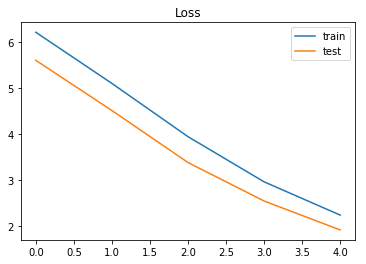

In [259]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

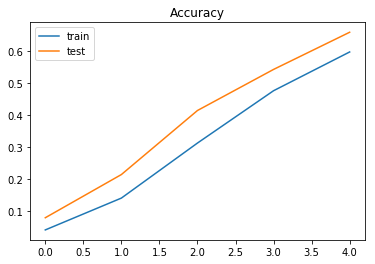

In [260]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [270]:
new_complaint = ['Tissue Atrophy']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['AGEP',
'Abdomen distended',
'Abdomen Acute',
'Abdominal Cramps',
'Abdominal Pain',
'Abdominal aortic bruit',
'Abdominal bloating',
'Abdominal discomfort',
'Abdominal distress',
'Abdominal pain lower',
'Abdominal pain upper',
'Abdominal tenderness',
'Abnormal behavior',
'Abnormal chest sounds',
'Abnormal coordination',
'Abnormal digestive tract function',
'Abnormal dreams',
'Abnormal ejaculation',
'Abnormal involuntary movements',
'Abnormal mental state',
'Abnormal platelets',
'Abnormal sensation in eye',
'Abnormal vision',
'Abrasion',
'Abscess',
'Absence Epilepsy',
'Absence of sensation',
'Accidental ingestion',
'Accidental injury',
'Accidental overdose',
'Accommodation disorder',
'Ache',
'Ache wrists',
'Acidosis',
'Acidosis hyperchloraemic',
'Acidosis Respiratory',
'Acne',
'Acneiform Eruptions',
'Acquired deformity of finger',
'Action Tremor',
'Activation syndrome',
'Actual Impaired Fluid Volume',
'Actual Inability To Taste',
'Acute Generalized Exanthematous Pustulosis',
'Acute Kidney Insufficiency',
'Acute bronchitis',
'Acute cystitis',
'Acute depression',
'Acute exacerbation of chronic bronchitis',
'Acute glaucoma',
'Acute intermittent porphyria',
'Acute leukemia',
'Acute liver injury',
'Acute myocardial infarction',
'Acute myocardial ischemia',
'Acute onset pain',
'Acute overdose',
'Acute psychosis',
'Acute pulmonary oedema',
'Acute pyelonephritis',
'Acute retention of urine',
'Acute schizophrenia',
'Acute sinusitis',
'Adams-Stokes Syndrome',
'Addisonian crisis',
'Adenocarcinoma',
'Adenocarcinoma of the gastroesophageal junction',
'Adenoma',
'Adipose Tissue Atrophy',
'Adjustment Disorders',
'Administration site reaction',
'Adnexitis',
'Adrenal Gland Hyperfunction',
'Adrenal cortex atrophy',
'Adrenal gland hypofunction',
'Adrenergic syndrome',
'Advanced breast cancer',
'Affect lability',
'Aggressive behavior',
'Aggressive reaction',
'Agitation',
'Agoraphobia',
'Agranulocytosis',
'Airway Obstruction',
'Akathisia',
'Akinesia',
'Alanine aminotransferase increased',
'Albumin low',
'Albuminuria',
'Alcohol abuse',
'Alcohol intolerance',
'Alcohol problem',
'Alcohol withdrawal syndrome',
'Alkaline phosphatase raised',
'Alkaline phosphatase serum increased',
'Alkalosis',
'Alkalosis Respiratory',
'Allergic Conjunctivitis',
'Allergic conditions',
'Allergic oedema',
'Allergic rhinitis (disorder)',
'Allergic sinusitis',
'Allergic urticaria',
'Allergy aggravated',
'Alopecia',
'Alopecia Areata',
'Alteration in patterns of urinary elimination',
'Altered Taste',
'Altered visual depth perception',
'Alzheimers Disease',
'Amblyopia',
'Amenorrhea',
'Amnesia',
'Amylase increased',
'Anal Fissure',
'Anaphylactic responses',
'Anaphylactoid reaction',
'Anaphylaxis',
'Anasarca',
'Anemia',
'Anemia Diamond-Blackfan',
'Anemia Hemolytic',
'Anemia Macrocytic',
'Anemia Megaloblastic',
'Aneurysm',
'Anger',
'Angina Pectoris',
'Angina Unstable',
'Angioedema',
'Angle Closure Glaucoma',
'Anhedonia',
'Anhidrosis',
'Animal bite',
'Anisocoria',
'Anisocytosis',
'Ankle Fractures',
'Ankle edema (finding)',
'Ankylosing spondylitis',
'Anorexia',
'Anorgasmia',
'Anosmia',
'Anthrax disease',
'Antibiotic-Associated Colitis',
'Anticholinergic Syndrome',
'Antinuclear antibody positive',
'Antisocial behavior',
'Anuria',
'Anxiety',
'Anxiety Disorders',
'Anxiety aggravated',
'Anxiety attack',
'Anxiety depression',
'Aortic Aneurysm',
'Aphasia',
'Aphthous Stomatitis',
'Aplastic Anemia',
'Apnea',
'Appendicitis',
'Application site erythema',
'Application site irritation',
'Application site pain',
'Application site pruritus',
'Application site rash',
'Application site reaction',
'Apraxias',
'Arachnoiditis',
'Arm Pain',
'Arrest of spermatogenesis',
'Arterial insufficiency',
'Arterial thrombosis',
'Arteriosclerosis',
'Arteritis',
'Arthralgia',
'Arthritis',
'Arthritis Gouty',
'Arthritis Psoriatic',
'Arthropathy',
'Arthropod bite',
'Arthropod sting',
'Articulation Disorders',
'Ascites',
'Aseptic Meningitis',
'Aseptic necrosis',
'Aspartate aminotransferase increased',
'Aspiration Pneumonia',
'Aspiration pneumonitis',
'Asterixis',
'Asthenia',
'Asthenic conditions',
'Asthenopia',
'Asthma',
'Asthma aggravated',
'Asthma chronic',
'Ataxia',
'Atelectasis',
'Athletic Injuries',
'Atonic seizures',
'Atrial Fibrillation',
'Atrial Flutter',
'Atrial Premature Complexes',
'Atrial arrhythmia',
'Atrial fibrillation and flutter',
'Atrial tachycardia',
'Atrioventricular Block',
'Atrioventricular junctional rhythm',
'Atrophic',
'Atrophic Vaginitis',
'Atrophic condition of skin',
'Atrophy of breast',
'Attention Deficit Disorder',
'Attention concentration difficulty',
'Attention deficit hyperactivity disorder',
'Atypical lymphocyte observed',
'Aura',
'Auricular swelling',
'Autoimmune hemolytic anemia',
'Autonomic nervous system disorders',
'Autonomic nervous system imbalance',
'Azotemia',
'BREAST PAIN FEMALE',
'Back Injuries',
'Back Pain',
'Back distress',
'Bacteremia',
'Bacterial Infections',
'Bacterial Vaginosis',
'Bacterial conjunctivitis',
'Bacterial prostatitis',
'Bad taste',
'Balanitis',
'Balanoposthitis',
'Basophilia',
'Battery (assault)',
'Bedwetting',
'Behavior showing increased motor activity',
'Benign Neoplasm',
'Benign neoplasm of breast',
'Berylliosis',
'Bicarbonate level',
'Biliary Colic',
'Bilirubin total decreased',
'Bilirubin total increased',
'Bilirubin total low',
'Binge eating disorder',
'Bipolar Disorder',
'Bipolar I disorder',
'Bipolar II disorder',
'Black hairy tongue',
'Blackout - symptom',
'Bladder dilatation',
'Bladder discomfort',
'Bladder dysfunction',
'Bladder irritability',
'Bladder pain',
'Bleeding esophageal varices',
'Bleeding gastric ulcer',
'Bleeding tendency',
'Bleeding time prolonged',
'Blepharitis',
'Blepharospasm',
'Blind Vision',
'Blindness of one eye (disorder)',
'Blindness Transient',
'Blood Coagulation Disorders',
'Blood alkaline phosphatase increased',
'Blood amylase increased',
'Blood and lymphatic system disorders',
'Blood bicarbonate decreased',
'Blood cholesterol increased',
'Blood coagulation',
'Blood cortisol decreased',
'Blood creatine phosphokinase increased',
'Blood creatinine increased',
'Blood glucose decreased',
'Blood glucose increased',
'Blood in stool',
'Blood lactate dehydrogenase increased',
'Blood monocytes increased',
'Blood osmolarity decreased',
'Blood potassium increased',
'Blood pressure alteration (finding)',
'Blood pressure diastolic increased',
'Blood pressure systolic decreased',
'Blood pressure systolic increased',
'Blood prolactin increased',
'Blood thyroid stimulating hormone increased',
'Blood triglycerides increased',
'Blood urea increased',
'Blood uric acid increased',
'Blood urine present',
'Blunted affect',
'Blurred vision',
'Body Weight decreased',
'Body height decreased',
'Body odor',
'Bone Diseases',
'Bone and joint infections',
'Bone cancer metastatic',
'Bone density decreased',
'Bone marrow depression',
'Bone necrosis',
'Bone pain',
'Bradycardia',
'Bradykinesia',
'Bradyphrenia',
'Brain Concussion',
'Brain Edema',
'Brain Injuries',
'Brain Neoplasms',
'Brain dysfunction',
'Break-through bleeding (finding)',
'Breast Carcinoma',
'Breast Diseases',
'Breast Feeding',
'Breast Fibrocystic Disease',
'Breast abscess',
'Breast engorgement',
'Breast swelling',
'Breast tenderness',
'Bronchial Spasm',
'Bronchitis',
'Bronchitis viral',
'Bronchitis Chronic',
'Bronchoconstriction',
'Bronchopneumonia',
'Bronchospasm Exercise-Induced',
'Bruxism',
'Buccoglossal syndrome',
'Buffalo hump',
'Bulimia',
'Bulimia Nervosa',
'Bulla',
'Bullous conditions',
'Bullous eruption',
'Bullous pemphigoid',
'Bundle-Branch Block',
'Burning sensation',
'Bursitis',
'CNS disorder',
'Cachexia',
'Calcinosis',
'Call-Fleming syndrome',
'Cancer pain',
'Candida albicans infection',
'Candidiasis',
'Candidiasis of vagina',
'Candidiasis Vulvovaginal',
'Candiduria',
'Capillary Fragility',
'Capillary fragility increased',
'Carbohydrate craving',
'Carbohydrate tolerance decreased',
'Carbuncle',
'Carcinogenicity',
'Carcinoid Tumor',
'Carcinoma',
'Carcinoma breast stage IV',
'Carcinoma of Male Breast',
'Carcinoma of lung',
'Cardiac Arrest',
'Cardiac Arrhythmia',
'Cardiac Death',
'Cardiac fibrillation',
'Cardiomegaly',
'Cardiomyopathies',
'Cardiomyopathy Dilated',
'Cardiopulmonary Arrest',
'Cardiotoxicity',
'Cardiovascular Diseases',
'Carditis',
'Carpal Tunnel Syndrome',
'Cartilage Diseases',
'Cataplexy',
'Cataract',
'Cataract specified',
'Cataract subcapsular',
'Catatonia',
'Catatonic reaction',
'Cellulitis',
'Central Nervous System Neoplasms',
'Central Serous Chorioretinopathy',
'Central nervous system depression (disorder)',
'Cerebellar Diseases',
'Cerebral Angiitis',
'Cerebral Arteriosclerosis',
'Cerebral Edema',
'Cerebral Embolism',
'Cerebral Hemorrhage',
'Cerebral Infarction',
'Cerebral Ischemia',
'Cerebral Thrombosis',
'Cerebral Vasospasm',
'Cerebral arteritis',
'Cerebrovascular Disorders',
'Cerebrovascular accident',
'Cervix Diseases',
'Cervix haemorrhage uterine',
'Change of bowel habit',
'Cheilitis',
'Chemical conjunctivitis',
'Chemosis',
'Chest Pain',
'Chest discomfort',
'Chest pain exertional',
'Chest tightness',
'Chest wall pain',
'Chickenpox',
'Chills',
'Chloasma',
'Choking',
'Choking sensation',
'Cholangitis',
'Cholecystitis',
'Cholelithiasis',
'Cholestasis',
'Cholesterol serum elevated',
'Chondrodystrophy',
'Choreoathetoid movements',
'Choreoathetosis',
'Chorioretinitis',
'Choroiditis',
'Chromatopsia',
'Chromaturia',
'Chromosomal mutation',
'Chronic Lymphocytic Leukemia',
'Chronic Obstructive Airway Disease',
'Chronic active hepatitis',
'Chronic pain',
'Chronic suppurative otitis media',
'Churg-Strauss Syndrome',
'Circumoral paresthesia',
'Clammy skin',
'Clostridium difficile colitis',
'Clumsiness',
'Cluster Headache',
'Cognition Disorders',
'Cogwheel Rigidity',
'Coinfection',
'Cold feet',
'Cold hands',
'Cold sweat',
'Cold symptoms',
'Colitis',
'Colitis Ischemic',
'Collagen Diseases',
'Colonic Polyps',
'Color blindness',
'Comatose',
'Common Cold',
'Common wart',
'Communicable Diseases',
'Community acquired pneumonia',
'Compartment syndromes',
'Complete atrioventricular block',
'Completed Suicide',
'Complications of Diabetes Mellitus',
'Compulsive Personality Disorder',
'Conduction disorder of the heart',
'Confusion',
'Congenital Abnormality',
'Congenital Heart Defects',
'Congenital adrenal hyperplasia',
'Congestive heart failure',
'Conjunctival haemorrhage',
'Conjunctival hyperemia',
'Conjunctival oedema',
'Conjunctivitis',
'Connective Tissue Diseases',
'Consciousness abnormal1',
'Constipation',
'Contact Dermatitis',
'Contracture',
'Contralateral breast cancer',
'Contusions',
'Convulsions aggravated',
'Convulsive Seizures',
'Coordination disturbance',
'Corneal Diseases',
'Corneal Opacity',
'Corneal Ulcer',
'Corneal deposits',
'Corneal epithelial staining pattern',
'Corneal epithelium defect',
'Corneal erosion',
'Corneal infiltrates',
'Corneal lesion',
'Corneal ulcer marginal',
'Coronary Artery Disease',
'Coronary artery disease aggravated',
'Coronary artery insufficiency',
'Cough decreased',
'Cough increased',
'Coughing',
'Coxalgia',
'Cramps of lower extremities',
'Creatine increased',
'Creatine phosphokinase increased',
'Creatinine increased',
'Creatinine low',
'Creatinine renal clearance decreased',
'Crohn Disease',
'Cross resistance',
'Crying abnormal',
'Crystal urine present',
'Crystalluria',
'Crystalluria calcium',
'Cumulative Trauma Disorders',
'Cushing Syndrome',
'Cushingoid facies',
'Cutaneous Candidiasis',
'Cutaneous Melanoma',
'Cutaneous hypersensitivity',
'Cutaneous vasculitis',
'Cyanosis',
'Cyst',
'Cyst of skin',
'Cystic Fibrosis',
'Cystitis',
'Cystitis haemorrhagic',
'Cytopenia',
'Daytime sleepiness',
'Deafness',
'Death (finding)',
'Decrease in appetite',
'Decreased Libido',
'Decreased diastolic arterial pressure',
'Decreased erythroid precursor production',
'Decreased interest',
'Decreased platelet count',
'Deep Vein Thrombosis',
'Degenerative polyarthritis',
'Deglutition Disorders',
'Dehydration',
'Delayed gastric emptying',
'Delayed orgasm',
'Delirium',
'Delusions',
'Dementia',
'Demyelinating polyneuropathy',
'Dental caries',
'Dependence',
'Dependence physiological',
'Dependence psychological',
'Depersonalization',
'Depressed Level of Consciousness',
'Depressed mood',
'Depression aggravated',
'Depression Bipolar',
'Depressive Symptoms',
'Depressive disorder',
'Depressive episode unspecified',
'Derealization',
'Dermatillomania',
'Dermatitis',
'Dermatitis acneiform',
'Dermatitis Allergic Contact',
'Dermatitis Atopic',
'Dermatitis Phototoxic',
'Dermatologic disorders',
'Dermatomycoses',
'Dermatomyositis',
'Diabetes Insipidus',
'Diabetes Mellitus',
'Diabetes Mellitus Non-Insulin-Dependent',
'Diabetes mellitus inadequate control',
'Diabetes with coma (disorder)',
'Diabetic',
'Diabetic Ketoacidosis',
'Diabetic Nephropathy',
'Diabetic Neuropathies',
'Diabetic foot infection',
'Diabetic peripheral neuropathic pain',
'Diabetic peripheral neuropathy',
'Diarrhea',
'Diarrhoea haemorrhagic',
'Diastolic hypertension',
'Difficulty focusing eyes',
'Difficulty passing urine',
'Difficulty walking',
'Diplopia',
'Disability',
'Discharge from eye',
'Discoloration of skin',
'Disease Exacerbation',
'Disease Progression',
'Diseases of mitral valve',
'Disk Herniated',
'Dislocations',
'Disorder of eye',
'Disorder of pericardium',
'Disorder of the optic nerve',
'Disorders of Porphyrin Metabolism',
'Disorientation',
'Disseminated Intravascular Coagulation',
'Distractibility',
'Distress',
'Distress gastrointestinal',
'Disturbance in attention',
'Disturbance in mood',
'Disturbance in sexual arousal',
'Disturbance in thinking',
'Diuresis',
'Diverticulitis',
'Dizziness',
'Dizziness postural',
'Dreaming excessive',
'Drooling',
'Drowsiness',
'Drug Allergy',
'Drug Dependence',
'Drug Eruptions',
'Drug Interactions',
'Drug abuse',
'Drug craving',
'Drug effect decreased',
'Drug fever',
'Drug intolerance',
'Drug level decreased',
'Drug level increased',
'Drug seeking behavior',
'Drug withdrawal syndrome',
'Drug-Induced Liver Injury',
'Dry cough',
'Dry scalp',
'Dry skin',
'Dry throat',
'Dryness of eye',
'Duodenal Ulcer',
'Duodenitis',
'Dysarthria',
'Dysentery',
'Dysequilibrium',
'Dysesthesia',
'Dysgeusia',
'Dysgraphia',
'Dyskinetic syndrome',
'Dyslexia',
'Dyslipidemias',
'Dysmenorrhea',
'Dysmyelopoietic Syndromes',
'Dyspareunia',
'Dyspepsia',
'Dysphasia',
'Dysphemia',
'Dysphonia',
'Dysphoria',
'Dyspnea',
'Dyspnea on exertion',
'Dysuria',
'Ear Diseases',
'Ear Inflammation',
'Ear and labyrinth disorders',
'Ear discomfort',
'Ear haemorrhage',
'Ear pruritus',
'Earache',
'Early Awakening',
'Early satiety',
'Ecchymosis',
'Eclampsia',
'Eczema',
'Edema',
'Edema hands',
'Edema of eyelid',
'Edema of foot (finding)',
'Edema of lower extremities',
'Effusion',
'Ejaculation delayed',
'Ejaculation disorder',
'Ejaculation failure',
'Electrocardiogram PR prolongation',
'Electrocardiogram PR shortened',
'Electrocardiogram QRS complex prolonged',
'Electrocardiogram QT corrected interval prolonged',
'Electrocardiogram QT prolonged',
'Electrocardiogram ST segment',
'Electrocardiogram abnormal',
'Electrocardiogram change',
'Electroencephalogram abnormal',
'Electrolyte abnormality',
'Elevated mood',
'Embolism',
'Embolus',
'Emotional disorder',
'Emotional distress',
'Encephalopathies',
'Endocarditis',
'Endocrine System Diseases',
'Endometrial Carcinoma',
'Endometrial adenocarcinoma',
'Endometrial disorder',
'Endometriosis',
'Endometritis',
'Endophthalmitis',
'Energy increased',
'Enlarged clitoris',
'Enlargement abdomen',
'Enteritis',
'Enteritis ulcerative',
'Enterocolitis',
'Enterocolitis Necrotizing',
'Enterocolitis Neutropenic',
'Enuresis',
'Enzyme Induction',
'Enzyme abnormality',
'Eosinopenia',
'Eosinophil count abnormal',
'Eosinophil count raised (finding)',
'Eosinophilia',
'Eosinophilic Pneumonia',
'Epicondylitis',
'Epidermal necrosis',
'Epidermolysis',
'Epididymitis',
'Epigastric discomfort',
'Epigastric pain',
'Epilepsies Myoclonic',
'Epilepsies Partial',
'Epilepsy',
'Epistaxis',
'Equilibration disorder',
'Erectile dysfunction',
'Erection increased',
'Erection prolonged',
'Eructation',
'Eruptions',
'Erysipelas',
'Erythema',
'Erythema Multiforme',
'Erythema Nodosum',
'Erythema facial',
'Erythema multiforme minor',
'Erythema multiforme severe',
'Erythema of eyelid',
'Esophageal Achalasia',
'Esophageal Stenosis',
'Esophageal motility disorders',
'Esophageal spasm',
'Esophagitis',
'Essential Hypertension',
'Essential Tremor',
'Estrogen Effect',
'Euphoric mood',
'Exaggerated startle response',
'Exanthema',
'Excessive bronchial secretion',
'Excessive daytime somnolence',
'Excessive tearing',
'Excitability',
'Excitation cerebral',
'Excitement emotion',
'Excoriation',
'Exfoliative conditions',
'Exfoliative dermatitis',
'Exfoliative rash',
'Exhaustion',
'Exophthalmos',
'Exostoses',
'Expressive language disorder',
'Extrapyramidal Disorders',
'Extrapyramidal symptoms',
'Extravasation',
'Extrinsic allergic alveolitis',
'Eye Abnormalities',
'Eye Hemorrhage',
'Eye Infections',
'Eye Injuries',
'Eye irritation',
'Eye oedema',
'Eye pain',
'Eye swelling',
'Eyelid exfoliation',
'Eyelid margin crusting',
'Eyelids pruritus',
'FEMALE LACTATION',
'FInding of estrangement',
'Facial Pain',
'Facial Paresis',
'Facial bones fracture',
'Facial edema',
'Facial muscle spasm',
'Facial paralysis',
'Failure to gain weight',
'Family stress',
'Fasciitis Plantar',
'Fasting',
'Fasting blood glucose increased',
'Fat embolism (disorder)',
'Fatal Outcome',
'Fatigability',
'Fatigue',
'Fatty Liver',
'Fear (Mental Process)',
'Fear of death',
'Febrile Neutropenia',
'Fecal Impaction',
'Fecal Incontinence',
'Feeling abnormal',
'Feeling despair',
'Feeling drunk',
'Feeling jittery',
'Feeling of body temperature change',
'Feeling suicidal (finding)',
'Feels hot',
'Female Genital Diseases',
'Female sexual dysfunction',
'Femoral Neck Fractures',
'Fertility female decreased',
'Fetal Alcohol Syndrome',
'Fetal Death',
'Fever',
'Fibromyalgia',
'First degree atrioventricular block',
'Fixed drug eruption',
'Fixed eruption',
'Flank Pain',
'Flat affect',
'Flatulence',
'Fluid intake increased',
'Fluid intake reduced',
'Fluid overload',
'Fluid retention',
'Flushing',
'Folic Acid Deficiency',
'Folliculitis',
'Food Poisoning',
'Food-Drug Interactions',
'Foot fracture',
'Foot pain',
'Footdrop',
'Foreign body sensation in eyes',
'Forgetfulness',
'Formication',
'Found dead (cause undetermined)',
'Fracture',
'Frequent bowel movements',
'Function kidney decreased',
'Function liver decreased',
'Furuncle',
'Furunculosis',
'Gagging',
'Gait abnormality',
'Gait Unsteady',
'Galactorrhea not associated with childbirth',
'Gamma globulins increased',
'Gamma-glutamyltransferase increased',
'Gangrene',
'Gastric Adenocarcinoma',
'Gastric irritation',
'Gastric ulcer',
'Gastritis',
'Gastroenteritis',
'Gastroesophageal reflux disease',
'Gastrointestinal Diseases',
'Gastrointestinal Hemorrhage',
'Gastrointestinal candidiasis',
'Gastrointestinal carcinoma',
'Gastrointestinal cramps',
'Gastrointestinal discomfort',
'Gastrointestinal infection',
'Gastrointestinal obstruction',
'Gastrointestinal pain',
'Gastrointestinal perforation',
'Gastrointestinal symptom',
'Gastrointestinal ulcer',
'General disorders and administration site conditions',
'General unsteadiness',
'Generalized Anxiety Disorder',
'Generalized Spasms',
'Generalized seizures',
'Genital Diseases Male',
'Genital candidiasis',
'Genital hemorrhage',
'Genital hypoaesthesia',
'Genital infection',
'Genital pain',
'Genitourinary chlamydia infection',
'Gilbert Disease (disorder)',
'Gilles de la Tourette syndrome',
'Gingival Hemorrhage',
'Gingival Hyperplasia',
'Gingival infection',
'Gingivitis',
'Glaucoma',
'Glomerulonephritis',
'Glossalgia',
'Glossitis',
'Glossopharyngeal Neuralgia',
'Glucose increased',
'Glucose low',
'Glucose tolerance abnormal',
'Glucose tolerance decreased',
'Glycosuria',
'Glycosylated haemoglobin increased',
'Goiter',
'Gonorrhea',
'Gout',
'Gout flare',
'Granuloma',
'Granuloma Annulare',
'Granulomatous liver disease',
'Gravitational oedema',
'Growth retardation',
'Guillain-Barre Syndrome',
'Guilt',
'Gynecomastia',
'HIV Infections',
'Haemoglobin decreased',
'Hair discoloration',
'Hair texture abnormal',
'Halitosis',
'Hallucinations',
'Hallucinations Auditory',
'Hallucinations Tactile',
'Hallucinations Visual',
'Hallucinogen Persisting Perception Disorder',
'Hand dermatitis',
'Hand pain',
'Hangover from any Alcohol or Other Drugs substance',
'Has tingling sensation',
'Hay fever',
'Head discomfort',
'Headache',
'Hearing Loss Partial',
'Hearing impairment',
'Hearing problem',
'Heart Block',
'Heart Diseases',
'Heart alternation',
'Heart failure',
'Heart murmur',
'Heartburn',
'Heat Stroke',
'Hematemesis',
'Hematochezia',
'Hematocrit decreased',
'Hematological Disease',
'Hematoma',
'Hematoma Subdural',
'Hematuria',
'Hemiplegia',
'Hemochromatosis',
'Hemoglobinuria',
'Hemoperitoneum',
'Hemoptysis',
'Hemorrhage',
'Hemorrhage abnormal',
'Hemorrhage of colon',
'Hemorrhage of urethra',
'Hemorrhagic colitis',
'Hemorrhoids',
'Hemospermia',
'Henoch-Schoenlein Purpura',
'Hepatic Coma',
'Hepatic Veno-Occlusive Disease',
'Hepatic cyst',
'Hepatic enzyme increased',
'Hepatic impairment',
'Hepatic infiltration eosinophilic',
'Hepatic necrosis',
'Hepatitis',
'Hepatitis acute',
'Hepatitis cholestatic',
'Hepatitis fulminant',
'Hepatitis granulomatous',
'Hepatitis symptom',
'Hepatobiliary disease',
'Hepatocellular Adenoma',
'Hepatomegaly',
'Hepatosplenomegaly',
'Hepatotoxicity',
'Hernia',
'Herpes',
'Herpes Simplex Infections',
'Herpes Zoster Ophthalmicus',
'Herpes zoster disease',
'Hiccup',
'High density lipoprotein decreased',
'High density lipoprotein increased',
'Hip Fractures',
'Hirsutism',
'Hoarseness',
'Homicidal ideation',
'Hordeolum',
'Hormone level abnormal',
'Hormone-refractory prostate cancer',
'Hostility',
'Hot flushes',
'House dust allergy',
'Human herpesvirus 6 infection',
'Hunger',
'Hydrocephalus',
'Hyperactive behavior',
'Hyperacusis',
'Hyperalgesia',
'Hyperammonemia',
'Hyperbilirubinemia',
'Hypercalcemia',
'Hypercalciuria',
'Hyperchloraemia',
'Hyperchlorhydria',
'Hypercholesterolemia',
'Hypercholesterolemia result',
'Hyperemia',
'Hyperesthesia',
'Hyperglycemia',
'Hyperhidrosis disorder',
'Hyperkalemia',
'Hyperkeratosis',
'Hyperlipidemia',
'Hypermagnesemia',
'Hypernatremia',
'Hyperphagia',
'Hyperphosphatemia (disorder)',
'Hyperpigmentation',
'Hyperplasia',
'Hyperprolactinemia',
'Hyperpyrexia',
'Hyperreflexia',
'Hypersensitive syndrome',
'Hypersensitivity',
'Hypersomnia',
'Hypertension worsened',
'Hypertension Renovascular',
'Hypertensive (finding)',
'Hypertensive crisis',
'Hypertensive disease',
'Hyperthyroidism',
'Hypertrichosis',
'Hypertriglyceridemia',
'Hypertrophic Cardiomyopathy',
'Hypertrophy',
'Hyperuricemia',
'Hyperventilation',
'Hypervigilance',
'Hypesthesia',
'Hypoaesthesia facial',
'Hypoaesthesia oral',
'Hypocalcemia',
'Hypochloremia (disorder)',
'Hypocholesterolemia',
'Hypochondriasis',
'Hypochromic anemia',
'Hypoesthesia eye',
'Hypogammaglobulinemia',
'Hypogeusia',
'Hypoglycemia',
'Hypohidrosis',
'Hypokalemia',
'Hypokalemic alkalosis',
'Hypokinesia',
'Hypomagnesaemia',
'Hypomania',
'Hypomenorrhea',
'Hyponatremia',
'Hypophosphatemia',
'Hypopigmentation disorder',
'Hypoplastic anemia',
'Hypopnea syndrome',
'Hypoproteinemia',
'Hyporeflexia',
'Hyposmia',
'Hyposthenuria',
'Hypotension',
'Hypotension Orthostatic',
'Hypotensive',
'Hypothermia natural',
'Hypothyroidism',
'Hypouricaemia',
'Hypoventilation',
'Hysteria',
'Icterus',
'Idiopathic thrombocytopenia',
'Ileitis',
'Ileus',
'Illness (finding)',
'Illusions',
'Immobile',
'Immune System Diseases',
'Impacted cerumen',
'Impaired cognition',
'Impaired gastric emptying',
'Impaired glucose tolerance',
'Impaired healing',
'Impetigo',
'Inappropriate ADH Syndrome',
'Incontinence',
'Increase in blood pressure',
'Increased Libido',
'Increased appetite (finding)',
'Increased bilirubin level (finding)',
'Increased frequency of micturition',
'Increased insulin requirement',
'Increased prolactin level',
'Increased sweating',
'Increased tendency to bruise',
'Indifferent mood',
'Induration',
'Infarction',
'Infection of ear',
'Infection of kidney',
'Infectious disorder of bronchus',
'Infective cystitis',
'Infective vaginitis',
'Infertility',
'Infestation',
'Inflammation',
'Inflammatory Bowel Diseases',
'Inflicted injury',
'Influenza',
'Influenza like illness',
'Influenza-like symptoms',
'Infusion site extravasation',
'Infusion site reaction',
'Infusion site reactions (HT)',
'Inhalational anthrax',
'Initial insomnia1',
'Injection site hypersensitivity',
'Injection site induration',
'Injection site infection',
'Injection site inflammation',
'Injection site mass',
'Injection site pain',
'Injection site reaction',
'Injection site swelling',
'Injury wounds',
'Instillation site irritation',
'Intentional injury',
'International normalised ratio abnormal',
'International normalised ratio decreased',
'International normalised ratio increased',
'Intestinal Obstruction',
'Intestinal Perforation',
'Intolerant of heat',
'Intoxication',
'Intraabdominal Infections',
'Intracranial Hemorrhages',
'Intracranial Hypertension',
'Intraocular pressure increased',
'Invasive Breast Carcinoma',
'Inverted T wave',
'Involuntary Movements',
'Iridocyclitis',
'Iritis',
'Iron deficiency anemia',
'Iron-Refractory Iron Deficiency Anemia',
'Irritable Bowel Syndrome',
'Irritable Mood',
'Ischaemic neuropathy',
'Ischemia',
'Ischial neuralgia',
'Itching of eye',
'Jaundice hepatocellular',
'Jaundice Obstructive',
'Jaw pain',
'Jaw stiffness',
'Joint injury',
'Joint sprain',
'Joint stiffness',
'Joint swelling',
'Juvenile arthritis',
'Keloid',
'Keratitis',
'Keratoconjunctivitis',
'Keratoconjunctivitis Sicca',
'Keratoconus',
'Keratopathy',
'Ketoacidosis',
'Ketogenic Diet',
'Ketonuria',
'Ketosis',
'Kidney Calculi',
'Kidney Diseases',
'Kidney Failure',
'Kidney Failure Acute',
'Kidney Failure Chronic',
'Kidney Neoplasm',
'Kidney function abnormal',
'Knee pain',
'Labile hypertension',
'Laboratory test abnormal',
'Labored breathing',
'Labyrinthine disorder',
'Labyrinthitis',
'Lack of drug effect',
'Lack of libido',
'Lack of spontaneous speech',
'Lacrimal Apparatus Diseases',
'Lacrimal Duct Obstruction',
'Lacrimation',
'Lacrimation abnormal',
'Lactic dehydrogenase activity increased',
'Large intestine perforation',
'Laryngeal Diseases',
'Laryngeal Edema',
'Laryngismus',
'Laryngitis',
'Latent tetany',
'Learning Disabilities',
'Leg edema',
'Lennox-Gastaut syndrome',
'Lens Opacities',
'Lenticular pigmentation',
'Lethargy',
'Leukemia',
'Leukemia Myelocytic Acute',
'Leukocytoclastic vasculitis',
'Leukocytosis',
'Leukonychia',
'Leukopenia',
'Leukoplakia Oral',
'Leukorrhea',
'Libido disorder',
'Lichen Planus',
'Lichen Simplex Chronicus',
'Lichenoid Eruptions',
'Lichenoid keratosis',
'Ligament injury',
'Lightheadedness',
'Limb discomfort',
'Limb injury',
'Limb paresis',
'Linear atrophy',
'Lingual-Facial-Buccal Dyskinesia',
'Lip swelling',
'Lipase increased',
'Lipids abnormal',
'Lipoma',
'Liver Cirrhosis',
'Liver Dysfunction',
'Liver Failure',
'Liver damage',
'Liver diseases',
'Liver fatty deposition',
'Liver function test normal',
'Liver function tests abnormal finding',
'Liver injury',
'Liver tenderness',
'Lobular carcinoma in situ of breast',
'Local reaction',
'Local swelling',
'Localized desquamation',
'Localized rash',
'Logorrhoea',
'Long-term memory loss',
'Loose stool',
'Loss of appetite (finding)',
'Low Back Pain',
'Low Cardiac Output',
'Low density lipoprotein increased',
'Lower respiratory tract infection',
'Lumbar disc lesion',
'Lung Diseases Interstitial',
'Lung Diseases Obstructive',
'Lung Neoplasms',
'Lung diseases',
'Lung infection',
'Lung infiltration',
'Lupus Erythematosus',
'Lupus Erythematosus Cutaneous',
'Lupus Erythematosus Discoid',
'Lupus Erythematosus Systemic',
'Lupus-like syndrome',
'Lymphadenitis',
'Lymphadenopathy',
'Lymphadenopathy cervical',
'Lymphangitis',
'Lymphatic Diseases',
'Lymphedema',
'Lymphocytoma cutis',
'Lymphocytosis',
'Lymphoma',
'Lymphopenia',
'Macromastia',
'Macular Edema Cystoid',
'Macular degeneration',
'Macular rash',
'Macular retinal edema',
'Maculopathy',
'Major Depressive Disorder',
'Major depressive disorder single episode',
'Malaise',
'Male infertility',
'Male sexual dysfunction',
'Malignant Neoplasms',
'Malignant neoplasm of breast',
'Malignant neoplasm of female breast',
'Malignant neoplasm of ovary',
'Malignant neoplasm of pancreas',
'Malignant neoplasm of prostate',
'Malignant syndrome',
'Malnutrition',
'Mammary Neoplasms',
'Mania acute',
'Manic',
'Manic episode',
'Manic psychosis',
'Marrow hyperplasia',
'Mask-like facies',
'Mass of body structure',
'Massive Hepatic Necrosis',
'Mastitis',
'Mastitis acute female',
'Mastodynia',
'McCune-Albright Syndrome',
'Mean blood pressure',
'Mediastinal Diseases',
'Medication residue',
'Megacolon Toxic',
'Melancholia',
'Melanoma',
'Melanosis',
'Melena',
'Memory Loss',
'Memory impairment',
'Menarche',
'Mendelson Syndrome',
'Meniere Disease',
'Meningism',
'Meningitis',
'Menometrorrhagia',
'Menopausal symptoms',
'Menopause',
'Menorrhagia',
'Menstruation Disturbances',
'Menstruation delayed',
'Menstruation irregular',
'Mental Depression',
'Mental Suffering',
'Mental disorders',
'Mental handicap',
'Mental status changes',
'Mesothelioma',
'Metabolic Bone Disorder',
'Metabolic Diseases',
'Metabolic acidosis',
'Metabolic alkalosis',
'Metastatic Carcinoma',
'Metastatic Neoplasm',
'Metastatic gastric adenocarcinoma',
'Metastatic malignant neoplasm to brain',
'Metastatic squamous cell carcinoma',
'Methemoglobinemia',
'Metrorrhagia',
'Middle insomnia',
'Migraine Disorders',
'Migraine aggravated',
'Miliaria',
'Minimal Brain Dysfunction',
'Miosis disorder',
'Mixed liver injury',
'Mobitz type I incomplete atrioventricular block',
'Monocytosis',
'Mood Disorders',
'Mood swings',
'Motion Sickness',
'Motor retardation',
'Mouth injury',
'Movement Disorders',
'Mucositis',
'Multi-infarct dementia',
'Multiple Myeloma',
'Multiple Organ Failure',
'Multiple Sclerosis',
'Muscle Cramp',
'Muscle Fatigue',
'Muscle Hypertonia',
'Muscle Rigidity',
'Muscle Spasticity',
'Muscle Weakness',
'Muscle contractions involuntary',
'Muscle damage',
'Muscle enzyme increased',
'Muscle fibrosis',
'Muscle hemorrhage',
'Muscle hypotonia',
'Muscle injury',
'Muscle mass',
'Muscle necrosis',
'Muscle rupture',
'Muscle tightness',
'Muscle twitch',
'Muscular Atrophy',
'Muscular fasciculation',
'Muscular stiffness',
'Musculoskeletal Diseases',
'Musculoskeletal Pain',
'Musculoskeletal chest pain',
'Musculoskeletal discomfort',
'Musculoskeletal stiffness',
'Mutism',
'Myalgia',
'Myasthenia Gravis',
'Myasthenias',
'Mycoses',
'Mycosis Fungoides',
'Mydriasis',
'Myelitis',
'Myelosuppression',
'Myocardial Infarction',
'Myocardial Ischemia',
'Myocardial rupture',
'Myocarditis',
'Myoclonus',
'Myoglobinuria',
'Myopathy',
'Myopia',
'Myositis',
'NEVUS EPIDERMAL (disorder)',
'Nail Diseases',
'Nail changes',
'Nail discoloration',
'Nail toxicity',
'Nails Ingrown',
'Narcolepsy',
'Nasal Polyps',
'Nasal burning',
'Nasal congestion (finding)',
'Nasal discomfort',
'Nasal irritation',
'Nasal septum deviation',
'Nasopharyngitis',
'Nausea',
'Neck Injuries',
'Neck Pain',
'Neck stiffness',
'Necrobiosis Lipoidica Diabeticorum',
'Necrolysis epidermal',
'Necrosis',
'Necrotizing Arteritis',
'Neonatal Abstinence Syndrome',
'Neoplasms',
'Nephritic syndrome',
'Nephritis',
'Nephritis Interstitial',
'Nephritis Tubulointerstitial',
'Nephrolithiasis',
'Nephropathy toxic',
'Nephrosis',
'Nephrotic Syndrome',
'Nephrotic Syndrome Minimal Change',
'Nerve injury',
'Nerve root lesion',
'Nervous system disorder',
'Nervous tremulousness',
'Nervousness',
'Nettle rash',
'Neuralgia',
'Neuritis',
'Neuroblastoma',
'Neurodermatitis',
'Neuroleptic Malignant Syndrome',
'Neuropathy',
'Neurotic Disorders',
'Neurotoxicity Syndromes',
'Neurotransmitter level altered',
'Neutropenia',
'Neutropenic infection',
'Neutropenic sepsis',
'Neutrophil count decreased',
'Neutrophilia (disorder)',
'Night Blindness',
'Night Terrors',
'Night cramps',
'Night sweats',
'Nightmares',
'Nipple discharge',
'Nitrogen balance negative',
'Nitrogen non-protein increased level result',
'Nocturia',
'Nodal arrhythmia',
'Node-negative breast cancer',
'Node-positive breast cancer',
'Nodule',
'Non-Small Cell Lung Carcinoma',
'Non-cardiac chest pain',
'Non-gonococcal urethritis (NGU)',
'Noninfiltrating Intraductal Carcinoma',
'Normocytic anemia',
'Nosocomial pneumonia',
'Nuchal Rigidity',
'Numbness',
'Nystagmus',
'Obesity',
'Obsessions',
'Obsessive compulsive behavior',
'Obsessive-Compulsive Disorder',
'Obstruction',
'Ocular Motility Disorders',
'Ocular discomfort',
'Ocular hyperemia',
'Ocular toxicity',
'Oculogyration',
'Oculogyric crisis',
'Odynophagia',
'Oesophageal candidiasis',
'Oesophageal stenosis acquired',
'Oligomenorrhea',
'Oligospermia',
'Oliguria',
'On examination - dry lips',
'Onycholysis',
'Onychomadesis',
'Onychomycosis',
'Ophthalmia Sympathetic',
'Opiate Addiction',
'Opioid naive',
'Opisthotonus',
'Opportunistic Infections',
'Oppositional',
'Optic Neuritis',
'Oral Hemorrhage',
'Oral Ulcer',
'Oral candidiasis',
'Oral fungal infection',
'Oral infection',
'Oral pain',
'Orchitis',
'Orchitis noninfective',
'Organ failure',
'Orgasmic Disorder',
'Orgasmic sensation decreased',
'Orofacial oedema',
'Oropharyngeal candidiasis',
'Oropharyngeal pain',
'Oropharyngeal swelling',
'Orthopnea',
'Orthostatic hypertension',
'Oscillopsia',
'Osteomalacia',
'Osteomyelitis',
'Osteopenia',
'Osteophyte',
'Osteoporosis',
'Osteosclerosis',
'Otitis Externa',
'Otitis Media',
'Otitis media acute',
'Otosalpingitis',
'Ototoxicity',
'Ovarian Carcinoma',
'Ovarian Cysts',
'Ovarian Diseases',
'Ovarian adenocarcinoma',
'Overgrowth bacterial',
'PRL increased',
'Pain',
'Pain in buttock',
'Pain in esophagus (finding)',
'Pain in limb',
'Pain in lower limb',
'Pain in testicle',
'Pain in urethra',
'Pain localised',
'Pain Postoperative',
'Painful erection',
'Painful respiration',
'Pallor',
'Palpitations',
'Pancreatitis',
'Pancreatitis acute',
'Pancreatitis haemorrhagic',
'Pancytopenia',
'Panic',
'Panic Attacks',
'Panic Disorder',
'Papillary muscle rupture',
'Papilledema',
'Papule',
'Paraesthesia oral',
'Paralysed',
'Paranasal sinus hypersecretion',
'Paranoia',
'Paranoid reaction',
'Paraparesis',
'Paraplegia',
'Parasitic infection',
'Paratyphoid Fever',
'Paresis',
'Paresthesia',
'Parkinson Disease',
'Parkinsonian Disorders',
'Parkinsonian gait',
'Parotitis',
'Paroxysmal nocturnal dyspnea',
'Partial permanent deafness',
'Partial pressure CO2 result',
'Partial thromboplastin time increased (finding)',
'Pathological Dilatation',
'Pathological fracture',
'Peeling of skin',
'Peliosis Hepatis',
'Pelvic Inflammatory Disease',
'Pelvic Pain',
'Pemphigus',
'Penile Diseases',
'Peptic Esophagitis',
'Peptic Ulcer',
'Perforation of nasal septum',
'Performance anxiety',
'Performance status decreased',
'Pericardial effusion',
'Pericarditis',
'Periodontal Abscess',
'Periodontal destruction',
'Periodontitis',
'Perioral Dermatitis',
'Periorbital oedema',
'Peripheral Neuropathy',
'Peripheral Vascular Diseases',
'Peripheral coldness',
'Peripheral edema',
'Peripheral ischaemia',
'Peripheral motor neuropathy',
'Peritonitis',
'Perseveration',
'Persistent Fetal Circulation Syndrome',
'Personality Disorders',
'Personality change',
'Pertussis',
'Petechiae',
'Pharyngeal oedema',
'Pharyngitis',
'Pharyngitis streptococcal',
'Pharyngolaryngeal pain',
'Phlebitis',
'Phlebitis superficial',
'Phobia Social',
'Phobic anxiety disorder',
'Photophobia',
'Photopsia',
'Photosensitivity of skin',
'Phototoxicity',
'Physiologic warmth',
'Pigmentation Disorders',
'Pituitary Neoplasms',
'Plague',
'Plague Septicemic',
'Plasma calcium decreased',
'Plasma osmolality decreased',
'Pleural effusion disorder',
'Pleurisy',
'Pneumonia',
'Pneumonia due to Klebsiella pneumoniae',
'Pneumonia Interstitial',
'Pneumothorax',
'Polycythemia',
'Polycythemia Vera',
'Polydipsia',
'Polymenorrhea',
'Polymyositis',
'Polyneuritis',
'Polyneuropathy',
'Polyposis Gastric',
'Polyps',
'Polyuria',
'Poor quality sleep',
'Porphyria Cutanea Tarda',
'Porphyria non-acute',
'Porphyrias Hepatic',
'Positional Vertigo',
'Post-Traumatic Stress Disorder',
'Post-traumatic pain',
'Posterior rhinorrhea',
'Postinfarction angina',
'Postmenopausal haemorrhage',
'Potassium Deficiency',
'Potassium increased',
'Potassium low',
'Pounding heart',
'Precocious Puberty',
'Precordial pain',
'Pregnancy',
'Pregnancy test positive',
'Premature Birth',
'Premature Cardiac Complex',
'Premature Ejaculation',
'Premature ventricular contractions',
'Premenstrual Tension',
'Premenstrual dysphoric disorder',
'Premenstrual syndrome',
'Presbyopia',
'Pressure of speech',
'Presyncope',
'Priapism',
'Procedural pain',
'Proctitis',
'Prolonged menses',
'Prostate cancer metastatic',
'Prostate carcinoma',
'Prostatic Diseases',
'Prostatitis',
'Prostatomegaly',
'Proteinuria',
'Prothrombin level abnormal',
'Prothrombin level decreased',
'Prothrombin level increased',
'Prothrombin time shortened',
'Protrusion tongue',
'Proximal myopathy',
'Prurigo',
'Pruritus',
'Pruritus Ani',
'Pruritus NEC',
'Pruritus Vulvae',
'Pruritus generalised',
'Pruritus genital',
'Pseudolymphoma',
'Pseudomembranous colitis',
'Pseudotumor',
'Pseudotumor Cerebri',
'Psoriasis',
'Psoriasis flare-up',
'Psychiatric symptom',
'Psychomotor skills impaired',
'Psychotic Disorders',
'Psychotic depression',
'Psychotic episode',
'Puerperal Disorders',
'Pulmonary Edema',
'Pulmonary Embolism',
'Pulmonary Emphysema',
'Pulmonary Eosinophilia',
'Pulmonary Fibrosis',
'Pulmonary Histiocytosis X',
'Pulmonary Hypertension',
'Pulmonary Infarction',
'Pulmonary congestion',
'Pulmonary hemorrhage',
'Pulmonary toxicity',
'Pulse irregular',
'Punctate epithelial erosion',
'Punctate keratitis',
'Pure Red-Cell Aplasia',
'Purging',
'Purpura',
'Purpura Thrombocytopenic Idiopathic',
'Purpura Thrombotic Thrombocytopenic',
'Purpuric rash',
'Pustular rash',
'Pustule',
'Pyelonephritis',
'Pyoderma',
'Pyuria',
'QRS complex',
'Radiation Pneumonitis',
'Radiation Recall Dermatitis',
'Radiation myelopathy',
'Radius Fractures',
'Rage',
'Raised liver function tests',
'Rales',
'Rash erythematous',
'Rash follicular',
'Rash generalised',
'Rash maculo-papular',
'Raynaud Phenomenon',
'Reaction aggravation',
'Reaction gastrointestinal',
'Reactive hypoglycemia',
'Recall phenomenon',
'Rectal Diseases',
'Rectal hemorrhage',
'Rectal tenesmus',
'Red blood cell disorders',
'Red blood cell sedimentation rate increased',
'Red cell aplasia',
'Redness',
'Redness of eye',
'Reduced interest in usual activities',
'Reflex Abnormal',
'Reflux gastritis',
'Renal Artery Stenosis',
'Renal Colic',
'Renal Insufficiency',
'Renal pain',
'Renal tubular acidosis',
'Renal vasculitis',
'Reproductive system disorder',
'Respiration Disorders',
'Respiration abnormal',
'Respiratory Depression',
'Respiratory Distress Syndrome Adult',
'Respiratory Distress Syndrome Newborn',
'Respiratory Failure',
'Respiratory Insufficiency',
'Respiratory Tract Infections',
'Respiratory arrest',
'Respiratory distress',
'Respiratory rate decreased',
'Respiratory sighs',
'Respiratory tract infection viral',
'Restless Legs Syndrome',
'Restlessness aggravated',
'Retching',
'Reticulocytosis',
'Retinal Detachment',
'Retinal Diseases',
'Retinal Hemorrhage',
'Retrograde amnesia',
'Retrograde ejaculation',
'Retrosternal pain',
'Reversible cerebral vasoconstriction syndrome',
'Reversible ischemic neurologic deficit (R.I.N.D.) syndrome',
'Rhabdomyolysis',
'Rhabdomyosarcoma',
'Rheumatic Fever',
'Rheumatic Heart Disease',
'Rheumatoid Arthritis',
'Rhinitis',
'Rhinitis perennial',
'Rhinitis Allergic Perennial',
'Rhinitis Atrophic',
'Rhinorrhea',
'Rib Fractures',
'Rickets',
'Right bundle branch block',
'Rigor - Temperature-associated observation',
'Rosacea',
'ST segment elevation (finding)',
'Sacroiliitis',
'Sad mood',
'Salivary gland enlargement',
'Salmonella infections',
'Salpingitis',
'Sarcoidosis',
'Sarcoma',
'Scab',
'Schizoaffective Disorder',
'Schizophrenia',
'Schizophrenia Childhood',
'Schizophrenic reaction',
'Sciatica',
'Scleral thinning',
'Scleritis',
'Scleroderma',
'Scoliosis unspecified',
'Scotoma',
'Scotoma Scintillating',
'Seborrheic dermatitis',
'Secondary Infections',
'Secondary adrenocortical insufficiency',
'Secondary hypertension',
'Secondary thrombocytopenia',
'Secretion of saliva',
'Sedated state',
'Seizures',
'Seizures Clonic',
'Seizures Focal',
'Self-Injurious Behavior',
'Self-injurious ideation',
'Sensation of blood flow',
'Sensation of foreign body',
'Sensation of heaviness',
'Sensation of warmth',
'Sense of smell altered',
'Sensitisation',
'Sensorineural Hearing Loss (disorder)',
'Sensory Discomfort',
'Sensory Disorders',
'Sensory neuropathy',
'Sepsis',
'Septicemia',
'Serotonin Syndrome',
'Serum Sickness',
'Serum albumin low result',
'Serum calcium increased',
'Serum creatinine increased',
'Serum potassium decreased',
'Serum potassium increased',
'Serum prolactin increased',
'Serum sickness-like reaction',
'Serum total protein decreased',
'Sexual Dysfunction',
'Sexually Transmitted Diseases',
'Shivering',
'Shock',
'Shock from electric current',
'Shock Cardiogenic',
'Shoulder Pain',
'Sialadenitis',
'Sialorrhea',
'Sicca Syndrome',
'Sickle Cell Dactylitis',
'Simple Partial Seizures',
'Simple Pulmonary Eosinophilia',
'Sinus Arrhythmia',
'Sinus Tachycardia',
'Sinus bradycardia',
'Sinus congestion',
'Sinus headache',
'Sinusitis',
'Sinusitis bacterial',
'Skin Diseases Bullous',
'Skin Diseases Infectious',
'Skin Papilloma',
'Skin Papule',
'Skin Pigmentation',
'Skin Ulcer',
'Skin and subcutaneous tissue disorders',
'Skin cold clammy',
'Skin hemorrhages',
'Skin hypertrophy',
'Skin irritation',
'Skin laceration',
'Skin necrosis',
'Skin nodule',
'Skin odour abnormal',
'Skin scaly',
'Skin thinness',
'Skin toxicity',
'Skin warm',
'Sleep Apnea Syndromes',
'Sleep Apnea Obstructive',
'Sleep Disorders',
'Sleep Disorders Circadian Rhythm',
'Sleep Talking',
'Sleep disturbances',
'Sleeplessness',
'Sluggishness',
'Slurred speech',
'Sneezing',
'Snoring',
'Social disinhibition',
'Social fear',
'Soft Tissue Infections',
'Soft stool (finding)',
'Soft tissue disorder',
'Solid tumour',
'Somnambulism',
'Somnolence0',
'Somnolence neonatal',
'Sore Throat',
'Sore eye',
'Sore mouth',
'Sore to touch',
'Spasm',
'Speech Disorders',
'Speech impairment',
'Sperm count decreased',
'Spermatogenesis abnormal',
'Spinal compression fracture',
'Spontaneous abortion',
'Sprain',
'Squamous cell carcinoma',
'Squamous cell carcinoma of the head and neck',
'Staphylococcal Infections',
'Status Epilepticus',
'Steatohepatitis',
'Stereotypic Movement Disorder',
'Steroid acne',
'Steroid myopathy',
'Steroid psychosis',
'Steroid withdrawal syndrome',
'Stevens-Johnson Syndrome',
'Stiffness',
'Stinging Sensation',
'Stomach Diseases',
'Stomach ache',
'Stomatitis',
'Streptococcal Infections',
'Streptococcal pneumonia',
'Stress',
'Stress at work',
'Stridor',
'Stupor',
'Stuttering',
'Subarachnoid Hemorrhage',
'Subconjunctival hemorrhage',
'Substance Withdrawal Syndrome',
'Sudden Cardiac Death',
'Sudden death',
'Sudden death cause unknown',
'Sudden unexplained death in epilepsy',
'Suicidal behaviour',
'Suicidal tendency',
'Suicide',
'Suicide attempt',
'Sunburn',
'Superinfection',
'Suprapubic pain',
'Supraventricular arrhythmia',
'Supraventricular tachycardia',
'Surgical intervention (finding)',
'Sustained ventricular tachycardia',
'Sweat Gland Diseases',
'Sweating',
'Sweating decreased',
'Swelling',
'Swelling face',
'Swollen tongue',
'Sympathomimetic Effect',
'Syncope',
'Syndrome screaming',
'Synovitis',
'Systolic hypertension',
'Tachyarrhythmia',
'Tachycardia',
'Tachycardia Ventricular',
'Tachypnea',
'Talkativeness',
'Tandem gait test abnormal',
'Tardive Dyskinesia',
'Taste Disorders',
'Taste bitter',
'Taste peculiar',
'Taste Metallic',
'Telangiectasis',
'Temper tantrum',
'Temporal Arteritis',
'Tenderness of gums',
'Tendinitis',
'Tendinous contracture',
'Tendon disorder',
'Tendon rupture',
'Tenosynovitis',
'Tension',
'Tension Headache',
'Teratogenesis',
'Testicular Diseases',
'Testicular atrophy',
'Tetany',
'Therapeutic response decreased',
'Thermal burn',
'Thirst',
'Thought retardation',
'Throat irritation',
'Throat tightness',
'Thrombocytopenia',
'Thrombocytopenic purpura',
'Thrombocytosis',
'Thromboembolic event',
'Thromboembolism',
'Thrombophlebitis',
'Thromboplastin decreased',
'Thrombosis',
'Thyroid Nodule',
'Thyroid function abnormal',
'Thyroid function test abnormal',
'Thyroiditis',
'Thyrotropin high',
'Tic Motor',
'Tic Vocal',
'Tietzes Syndrome',
'Tingling of extremity',
'Tinnitus',
'Tissue Adhesions',
'Toe walking',
'Tolerance development',
'Tongue Diseases',
'Tongue discolouration',
'Tongue oedema',
'Tongue paralysis',
'Tonic - clonic seizures',
'Tonic-Clonic Epilepsy',
'Tonsillitis',
'Tooth Abnormalities',
'Tooth Discoloration',
'Tooth Diseases',
'Tooth Erosion',
'Tooth Injuries',
'Tooth abscess',
'Tooth caries aggravated',
'Tooth infection',
'Toothache',
'Torsades de Pointes',
'Torticollis',
'Toxic Epidermal Necrolysis',
'Tracheal Diseases',
'Tracheitis',
'Trachyonychia',
'Traffic accident on public road',
'Tranquillisation excessive',
'Transaminases increased',
'Transformed migraine',
'Transfusion Reaction',
'Transient Ischemic Attack',
'Transitory deafness',
'Trauma to the abdomen',
'Traumatic fracture',
'Traumatic haematoma',
'Traumatic injury',
'Trembling',
'Tremor',
'Trichinellosis',
'Trigeminal Neuralgia',
'Trismus',
'Tuberculosis',
'Tuberculosis Meningeal',
'Tuberculosis Pulmonary',
'Tumor pain',
'Tumour flare',
'Tympanic Membrane Perforation',
'Typhoid Fever',
'Ulcer',
'Ulcer haemorrhage',
'Ulcer of esophagus',
'Ulcer on tongue',
'Ulcerative Colitis',
'Ulcerative esophagitis',
'Ulcerative stomatitis',
'Ulna Fractures',
'Unable to concentrate',
'Unconscious State',
'Underweight',
'Unilateral deafness',
'Unplanned pregnancy',
'Unresponsive to stimuli',
'Unspecified Abortion',
'Unspecified circulatory system disorder',
'Unspecified visual loss',
'Upper Respiratory Infections',
'Upper limb oedema',
'Upper motor neurone lesion',
'Upset stomach',
'Uremia',
'Ureteral Calculi',
'Ureteral obstruction',
'Urethritis',
'Urgency of micturition',
'Uric acid high',
'Uric acid level increased',
'Urinary Incontinence',
'Urinary Retention',
'Urinary hesitation',
'Urinary tract infection',
'Urination Disorders',
'Urine abnormality',
'Urine drug screen positive',
'Urine flow decreased',
'Urine odour abnormal',
'Urine odour foul',
'Urogenital Abnormalities',
'Urogenital haemorrhage',
'Urolithiasis',
'Urologic Diseases',
'Urticaria',
'Urticaria localised',
'Uterine Cancer',
'Uterine Cervicitis',
'Uterine Corpus Sarcoma',
'Uterine Fibroids',
'Uterine Neoplasms',
'Uterine Polyp',
'Uterine fibroids enlarged',
'Uterine hemorrhage',
'Uterine spasm',
'Uveitis',
'Uveitis Posterior',
'Vaginal Discharge',
'Vaginal Hemorrhage',
'Vaginal dryness',
'Vaginal itching',
'Vaginitis',
'Vanishing bile duct syndrome',
'Varicosity',
'Variegate Porphyria',
'Vascular Diseases',
'Vascular Headaches',
'Vasculitic rash',
'Vasculitis',
'Vasculitis necrotising',
'Vasculitis Leukocytoclastic Cutaneous',
'Vasodilation',
'Vasospasm',
'Vasovagal syncope',
'Vein disorder',
'Vein engorged (finding)',
'Venoocclusive disease',
'Venous Insufficiency',
'Venous Thromboembolism',
'Ventricular Dysfunction Left',
'Ventricular Fibrillation',
'Ventricular Septal Defects',
'Ventricular arrhythmia',
'Ventricular bigeminy',
'Ventricular hypertrophy',
'Verbal repetition',
'Vertigo',
'Vesiculobullous rash',
'Vestibular Diseases',
'Violent',
'Viral diarrhoea',
'Viral upper respiratory tract infection',
'Virus Diseases',
'Vision Disorders',
'Visual Impairment',
'Visual acuity reduced',
'Visual colour distortions',
'Visual disturbance',
'Vitreous Detachment',
'Vitreous disorder',
'Vitreous floaters',
'Vivid dreams',
'Vomiting',
'Vulvovaginal mycotic infection',
'Vulvovaginal pruritus',
'Vulvovaginitis',
'WBC abnormal',
'Wakefulness',
'Waldenstrom Macroglobulinemia',
'Water Intoxication',
'Water retention (finding)',
'Watery eyes',
'Wave slowing',
'Weepiness',
'Weight Gain',
'Wheezing',
'Whiplash Injuries',
'White blood cell count abnormal',
'White blood cell count decreased',
'White blood cell count increased (lab result)',
'Withdrawal Symptoms',
'Withdrawal seizures',
'Word finding difficulty (disorder)',
'Wound Infection',
'Wounds and Injuries',
'Xerophthalmia',
'Xerostomia',
'Yawning'
]
print(pred, labels[np.argmax(pred)])

[[5.6317316e-05 4.0134411e-05 1.6143616e-05 ... 3.0680374e-05
  2.5190433e-05 2.1087779e-05]] Creatinine low


#We are now ready to move onto our next deep learning model Fast ai

In [0]:
import fastai 
from fastai import * 
from fastai.text import * 

In [0]:
train = train.drop(['Disease'], axis = 1)

In [0]:
valid = valid.drop(['Disease'], axis = 1)

In [0]:
# Language model data 
data_lm = TextLMDataBunch.from_df(train_df = train, valid_df = valid, path = './') 

In [275]:
print(data_lm.train_ds.vocab.itos)

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', 'pain', 'mood', 'increased', 'disorder', 'abnormal', 'withdrawal', 'anxiety', 'weight', 'decreased', 'symptoms', 'disorders', 'behavior', 'sleeplessness', 'syndrome', 'feeling', 'drug', 'diseases', 'insomnia', 'somnolence', 'finding', 'disturbance', 'sleep', 'energy', 'got', 'like', 'mental', 'appetite', 'skin', 'acute', 'gain', 'blood', 'depression', 'nausea', 'excitability', 'irritable', 'hyperactive', 'ceiling', 'awake', 'attention', 'feelings', 'feel', 'drowsiness', 'dizziness', 'panic', 'state', 'body', 'heart', 'muscle', 'rash', 'swelling', 'depressed', 'nt', 'swings', 'bipolar', '#', 'allergic', 'wakefulness', 'loss', 'headache', 'disease', 'infection', 'liver', 'dreams', 'reaction', 'fatigue', 'breast', 'tremor', 'respiratory', 'site', 'eye', 'injury', 'joint', 'rage', 'abdominal', 'hemorrhage', 'attack', 'attacks', 'deficit', 'sleepy', 'carcinoma', 'brain', 'psychotic', 'dry', 'tired', 'initial',

In [276]:
data_lm.show_batch()

idx,text
0,xxbos pounding heart xxbos neoplasms xxbos alopecia xxbos bradycardia xxbos visual colour distortions xxbos posterior rhinorrhea xxbos eosinophilic pneumonia xxbos hypogeusia xxbos common cold xxbos tendon disorder xxbos tendon rupture xxbos cerebrovascular accident xxbos stridor xxbos female lactation xxbos restless legs syndrome xxbos periorbital oedema xxbos persistent fetal circulation syndrome xxbos labile hypertension xxbos ulna fractures xxbos peripheral motor neuropathy xxbos chronic lymphocytic leukemia xxbos orofacial oedema xxbos growth retardation
1,xxbos hyperplasia xxbos papilledema xxbos myasthenia gravis xxbos localized rash xxbos rash generalised xxbos failure gain weight xxbos ventricular hypertrophy xxbos facial edema xxbos pain xxbos memory impairment xxbos pain limb xxbos metrorrhagia xxbos white blood cell count abnormal xxbos tuberculosis pulmonary xxbos tingling extremity xxbos oral pain xxbos alopecia areata xxbos hypesthesia xxbos cholelithiasis xxbos dry cough xxbos schizophrenia childhood xxbos pharyngolaryngeal pain xxbos schizophrenia xxbos atrophic xxbos skin
2,xxbos muscle rigidity xxbos necrobiosis lipoidica diabeticorum xxbos steroid withdrawal syndrome xxbos collagen diseases xxbos ulcerative colitis xxbos metastatic malignant neoplasm brain xxbos taste peculiar xxbos taste bitter xxbos abdominal distress xxbos urolithiasis xxbos gastrointestinal candidiasis xxbos cerebral vasospasm xxbos sexual dysfunction xxbos viral upper respiratory tract infection xxbos petechiae xxbos pneumothorax xxbos hyperkalemia xxbos vanishing bile duct syndrome xxbos shoulder pain xxbos anorexia xxbos anosmia xxbos mycoses xxbos leukemia
3,amnesia xxbos toxic epidermal necrolysis xxbos hypogammaglobulinemia xxbos ulcerative esophagitis xxbos blackout symptom xxbos laboratory test abnormal xxbos acidosis hyperchloraemic xxbos sleep disturbances xxbos sleep apnea syndromes xxbos estrogen effect xxbos hallucinations xxbos ketonuria xxbos enterocolitis xxbos serum potassium increased xxbos skin ulcer xxbos fecal impaction xxbos endometritis xxbos application site erythema xxbos dysgeusia xxbos endometriosis xxbos oligomenorrhea xxbos eosinophilia xxbos nasal polyps xxbos chest tightness xxbos dental caries xxbos
4,neat freak mode xxbos obsessive compulsive behavior xxbos i m shooting xxbos feeling suicidal finding xxbos mental disorders xxbos painful b xxbos painful erection xxbos losing weight xxbos body weight decreased xxbos completely useless xxbos attention deficit disorder xxbos behaviour problems xxbos abnormal behavior xxbos feel weird xxbos feeling abnormal xxbos nicer xxbos elevated mood xxbos gain weight xxbos weight gain xxbos angry xxbos rage xxbos pain xxbos pain xxbos


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [278]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


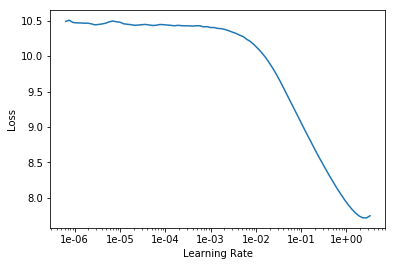

In [279]:
learn.recorder.plot()

#Eventually, the learning rate will become high so that loss will get worse. Looking at the plot of learning rate against loss we determine the lowest point (around 1e-1 for the plot above) and go back by one magnitude and choose that as a learning rate

# train the learner object with learning rate = 1e-2 

In [280]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,7.658774,5.678557,0.311082,06:59


In [281]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.145348,4.604232,0.379825,10:13


In [0]:
learn.save('ft_enc')

In [0]:
learn.load('ft_enc');

In [287]:
learn.predict("vanishing bile ", n_words=2)

'vanishing bile  priapism xxbos'

#Save the encoder

In [0]:
learn.save_encoder('ft_enc')

# Classifier model data

In [0]:
data_clas = TextClasDataBunch.from_df('./', train_df=train, valid_df=valid, vocab=data_lm.train_ds.vocab, bs=64)

In [291]:
data_clas.show_batch()

text,target
xxbos # dreams whilst taking # effexor # crazy # messed amp totally # weird,C0235966
xxbos reason have nt downed antidepressants sertraline overdose rarely results death,C0424000
xxbos reason have nt downed antidepressants sertraline overdose rarely results death,C0424000
xxbos i m going pissed ends getting adderall prescription taken away,C1510472
xxbos feel like devil living inside brain forcing think bazaar thoughts,C0033975


In [0]:
classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
classifier.load_encoder('ft_enc')

In [293]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


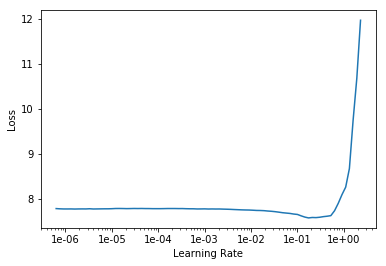

In [294]:
classifier.recorder.plot()

# The learning rate around 2e-2 seems right, so let us train the classifier:

In [295]:
classifier.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.594391,3.246213,0.411628,07:10


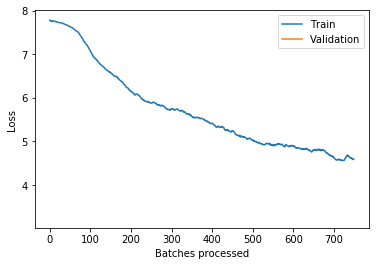

In [296]:
classifier.recorder.plot_losses()

# There is scope to train the classifier further as loss is going down

In [0]:
classifier.freeze_to(-2)

In [298]:
classifier.fit_one_cycle(3, slice(5e-3/2., 5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.755331,2.414308,0.511962,08:04
1,2.986723,1.644763,0.665590,07:57
2,2.823287,1.456287,0.693092,08:04


#We think this is state of the art results achieved using deep learning techniques. We could not compare our results with others as Sem Eval task 11 results are not published yet.

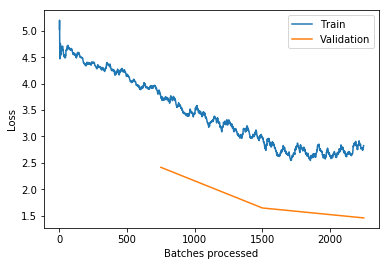

In [299]:
classifier.recorder.plot_losses()

#Underfitting if: training loss >> validation loss
# Perhaps it was possible to achieve higher accuracy
# However, we also see training loss becomes almost flat, even starting to show slight increase.
# We were not able to run more epochs as we ran out of disk usage.

In [300]:
classifier.predict("My stomach hurts! real bad")

(Category C0424166,
 tensor(1633),
 tensor([6.6940e-04, 9.1635e-04, 2.1263e-05,  ..., 1.3490e-06, 1.0990e-06,
         2.2622e-06]))

# Trying to make predictions